# Classification model using Decision Tree

### 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

### 2. Upload Clinic data

In [2]:
path ='../../../../Data_preprocessing/Prediction PFS/RNA+Clinic joined/New/Clinical_data_and_RNA_22_Features_PFS.csv'
data = pd.read_csv(path)
data.head()

,Unnamed: 0,RNA_ID,Age,Sarc,Rhab,Number_of_Prior_Therapies,Days_from_TumorSample_Collection_and_Start_of_Trial_Therapy,Tumor_Shrinkage,PFS,TM_TC_Ratio,...,CTC-523E23.14,CTD-2050N2.1,DDX43P2,GLUD1P4,LINC01446,LINC01602,RNF212,RP11-123J14.1,RP11-326N17.1,RP11-353N14.5
0,0,G138701_RCCBMS-00020-T_v1_RNA_OnPrem,62.0,0.0,0.0,2.0,962.0,-16.406250,12.164384,0.766909,...,21.01388,21.02976,20.99861,21.07023,20.99572,21.03733,30.21949,21.00825,20.99301,21.10114
1,1,G138701_RCCBMS-00097-T_v1_RNA_OnPrem,67.0,0.0,0.0,2.0,254.0,-40.000000,5.490411,0.773269,...,21.01388,21.02976,20.99861,21.07023,22.16510,21.03733,30.76723,21.00825,20.99301,21.10114
2,2,G138701_RCCBMS-00141-T_v1_RNA_OnPrem,62.0,0.0,0.0,1.0,800.0,-89.436620,61.906849,1.782859,...,21.01388,21.02976,20.99861,21.07023,20.99572,21.03733,27.61482,21.00825,20.99301,21.10114
3,3,G138701_RCCBMS-00099-T_v1_RNA_OnPrem,60.0,0.0,0.0,3.0,790.0,11.787072,1.249315,5.890573,...,21.01388,21.02976,20.99861,21.07023,20.99572,21.03733,32.89925,21.00825,20.99301,21.10114
4,4,G138701_RCCBMS-00163-T_v1_RNA_OnPrem,76.0,0.0,0.0,2.0,1241.0,0.000000,5.654795,1.374775,...,21.01388,21.02976,20.99861,21.07023,20.99572,21.03733,23.21111,21.00825,20.99301,21.10114


In [3]:
data = data[['RNA_ID','MSKCC_FAVORABLE', 'MSKCC_INTERMEDIATE', 'MSKCC_NA', 'MSKCC_POOR','PFS','AC006007.1',
'AC006262.10',
'AC006296.2',
'AC010729.2',
'AC012363.13',
'AC013436.6',
'AC023128.1',
'AC078842.3',
'AC091814.2',
'AP000997.2',
'AP006285.7',
'CTC-436K13.4',
'CTC-523E23.14',
'CTD-2050N2.1',
'DDX43P2',
'GLUD1P4',
'LINC01446',
'LINC01602',
'RNF212',
'RP11-123J14.1',
'RP11-326N17.1',
'RP11-353N14.5']]


In [4]:
data.head()

,RNA_ID,MSKCC_FAVORABLE,MSKCC_INTERMEDIATE,MSKCC_NA,MSKCC_POOR,PFS,AC006007.1,AC006262.10,AC006296.2,AC010729.2,...,CTC-523E23.14,CTD-2050N2.1,DDX43P2,GLUD1P4,LINC01446,LINC01602,RNF212,RP11-123J14.1,RP11-326N17.1,RP11-353N14.5
0,G138701_RCCBMS-00020-T_v1_RNA_OnPrem,1,0,0,0,12.164384,21.024011,20.998508,21.01321,21.050318,...,21.01388,21.02976,20.99861,21.07023,20.99572,21.03733,30.21949,21.00825,20.99301,21.10114
1,G138701_RCCBMS-00097-T_v1_RNA_OnPrem,1,0,0,0,5.490411,21.024011,20.998508,21.01321,21.050318,...,21.01388,21.02976,20.99861,21.07023,22.16510,21.03733,30.76723,21.00825,20.99301,21.10114
2,G138701_RCCBMS-00141-T_v1_RNA_OnPrem,0,0,0,1,61.906849,21.024011,20.998508,21.01321,21.050318,...,21.01388,21.02976,20.99861,21.07023,20.99572,21.03733,27.61482,21.00825,20.99301,21.10114
3,G138701_RCCBMS-00099-T_v1_RNA_OnPrem,1,0,0,0,1.249315,21.024011,20.998508,21.01321,21.050318,...,21.01388,21.02976,20.99861,21.07023,20.99572,21.03733,32.89925,21.00825,20.99301,21.10114
4,G138701_RCCBMS-00163-T_v1_RNA_OnPrem,0,1,0,0,5.654795,21.024011,20.998508,21.01321,21.050318,...,21.01388,21.02976,20.99861,21.07023,20.99572,21.03733,23.21111,21.00825,20.99301,21.10114


In [5]:
Y = [] # Target column
# For each entry I classified it by its PFS value.
for i in range (len(data)):
    if data.PFS[i]<3: # If PFS is lower than 3 months, I will consider it as NonResponder (NR)
        Y.append(0)
    else:
        Y.append(1)# If PFS is over 3 months, I will consider it as Responder (R)

# As I won't need this columns any more, I deleted them.
data = data.drop('PFS', axis=1)
data = data.drop('RNA_ID', axis=1)

X = data.iloc[:,0:36] # I selected all the columns by removing the Unnamed column (row id) and the Target column.

print(X)
print('Numero de pacientes: ',len(Y))

     MSKCC_FAVORABLE  MSKCC_INTERMEDIATE  MSKCC_NA  MSKCC_POOR  AC006007.1  \
0                  1                   0         0           0   21.024011   
1                  1                   0         0           0   21.024011   
2                  0                   0         0           1   21.024011   
3                  1                   0         0           0   21.024011   
4                  0                   1         0           0   21.024011   
..               ...                 ...       ...         ...         ...   
176                0                   0         1           0   20.959318   
177                0                   0         1           0   20.959318   
178                0                   0         1           0   20.959318   
179                0                   0         1           0   20.959318   
180                0                   0         1           0   20.959318   

     AC006262.10  AC006296.2  AC010729.2  AC012363.13  AC013436

### 3. Train-Test dataset split

In [6]:
XTrain, XTest, yTrain, yTest = train_test_split(X, Y, test_size=0.20, random_state=125)

# Convert sets to arrays
XTrain = XTrain.values
XTest = XTest.values

print('Training set size:', len(XTrain))
print('Target column size of the training set:', len(yTrain))
print('Test set size:', len(XTest))
print('Target column size of the test set:', len(yTest))

Training set size: 144
Target column size of the training set: 144
Test set size: 37
Target column size of the test set: 37


### 4. Select the parameters of the model and fit it

In [7]:
param_grid = {'min_samples_leaf': [2,5,7,10],
              'min_samples_split': [2, 5, 7, 10],
              'max_depth':[2,5,10,12,15,20,100],
              'criterion':['entropy','gini'],
              'splitter': ['best', 'random'],
              'random_state':[125]}

# I created a GridSearchCV which allows us to systematically evaluate and select the parameters of our model.
# By indicating a model and the parameters to test, you can evaluate the performance of the first one based on the
# seconds through cross validation.
clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5)

clf.fit(XTrain , yTrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 5, 10, 12, 15, 20, 100],
                         'min_samples_leaf': [2, 5, 7, 10],
                         'min_samples_split': [2, 5, 7, 10],
                         'random_state': [125],
                         'splitter': ['best', 'random']})

In [8]:
print("Best estimate of parameters according to GridSearchCV:")
model = clf.best_estimator_
# Fit the model with the best parameters
model.fit(XTrain , yTrain)

Best estimate of parameters according to GridSearchCV:


DecisionTreeClassifier(max_depth=10, min_samples_leaf=7, random_state=125)

In [9]:
print("Best result of the cross validation of the model with the best paramters: " +str(clf.best_score_))

Best result of the cross validation of the model with the best paramters: 0.6588669950738916


### 5. Prediction

In [10]:
# Making predictions with the optimal model on the training dataset
yhatTrain = model.predict(XTrain)
contTrain = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTrain),1) :
    if (yhatTrain[i] == yTrain[i]):
        contTrain = contTrain + 1

In [11]:
# Making predictions with the optimal model on the test dataset
yhatTest = model.predict(XTest)
contTest = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTest),1) :
    if (yhatTest[i] == yTest[i]):
        contTest = contTest + 1


### 6. Results

In [12]:
print('Final accuracy on the training dataset: ' + str(contTrain/len(yTrain)))
print('Final accuracy on the testing dataset: ' + str(contTest/len(yTest)))

Final accuracy on the training dataset: 0.7638888888888888
Final accuracy on the testing dataset: 0.4594594594594595


In [13]:
from sklearn.metrics import classification_report,confusion_matrix

print('----------------Confusion Matrix (Training)------------------')
print(confusion_matrix(yTrain,yhatTrain))
print('Input data:  ' + str(np.array(yTrain)))
print('Prediction:        ' +str(yhatTrain))

----------------Confusion Matrix (Training)------------------
[[51 14]
 [20 59]]
Input data:  [0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 0 1
 1 0 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 0 1
 1 0 0 1 0 0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0
 1 0 1 1 0 0 0 0 1 1 1 0 1 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0]
Prediction:        [0 1 1 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 0 1 1 0 1
 1 1 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 0 0 1 1 1 1
 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0
 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1]


In [14]:
print(classification_report(yTrain,yhatTrain))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75        65
           1       0.81      0.75      0.78        79

    accuracy                           0.76       144
   macro avg       0.76      0.77      0.76       144
weighted avg       0.77      0.76      0.76       144



In [15]:
print('----------------Confusion Matrix (Test)------------------')
print(confusion_matrix(yTest,yhatTest))
print('Input data:  ' + str(np.array(yTest)))
print('Prediction:        ' +str(yhatTest))

----------------Confusion Matrix (Test)------------------
[[11  9]
 [11  6]]
Input data:  [1 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 1 1 1]
Prediction:        [0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 1 0]


In [16]:
print(classification_report(yTest,yhatTest))

              precision    recall  f1-score   support

           0       0.50      0.55      0.52        20
           1       0.40      0.35      0.38        17

    accuracy                           0.46        37
   macro avg       0.45      0.45      0.45        37
weighted avg       0.45      0.46      0.46        37



### 7. Results visualizaton

In [17]:
X = data.iloc[1:1:34]
print(X)
cols = []
for i in X:
    if i!= 'Unnamed: 0':
        cols.append(i)
print(len(cols))

Empty DataFrame
Columns: [MSKCC_FAVORABLE, MSKCC_INTERMEDIATE, MSKCC_NA, MSKCC_POOR, AC006007.1, AC006262.10, AC006296.2, AC010729.2, AC012363.13, AC013436.6, AC023128.1, AC078842.3, AC091814.2, AP000997.2, AP006285.7, CTC-436K13.4, CTC-523E23.14, CTD-2050N2.1, DDX43P2, GLUD1P4, LINC01446, LINC01602, RNF212, RP11-123J14.1, RP11-326N17.1, RP11-353N14.5]
Index: []

[0 rows x 26 columns]
26


In [18]:
from sklearn.tree import export_text

texto_modelo = export_text(
                    decision_tree = model,
                    feature_names = cols
               )
print(texto_modelo)

|--- AC006296.2 <= 21.00
|   |--- RNF212 <= 31.40
|   |   |--- RNF212 <= 27.67
|   |   |   |--- class: 1
|   |   |--- RNF212 >  27.67
|   |   |   |--- class: 1
|   |--- RNF212 >  31.40
|   |   |--- class: 1
|--- AC006296.2 >  21.00
|   |--- RP11-123J14.1 <= 21.06
|   |   |--- MSKCC_FAVORABLE <= 0.50
|   |   |   |--- RNF212 <= 27.76
|   |   |   |   |--- RNF212 <= 23.79
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- RNF212 >  23.79
|   |   |   |   |   |--- class: 1
|   |   |   |--- RNF212 >  27.76
|   |   |   |   |--- RNF212 <= 32.54
|   |   |   |   |   |--- RNF212 <= 31.91
|   |   |   |   |   |   |--- RP11-353N14.5 <= 21.07
|   |   |   |   |   |   |   |--- RNF212 <= 29.90
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- RNF212 >  29.90
|   |   |   |   |   |   |   |   |--- RNF212 <= 31.54
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- RNF212 >  31.54
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |  

Profundidad del árbol: 9
Número de nodos terminales: 17


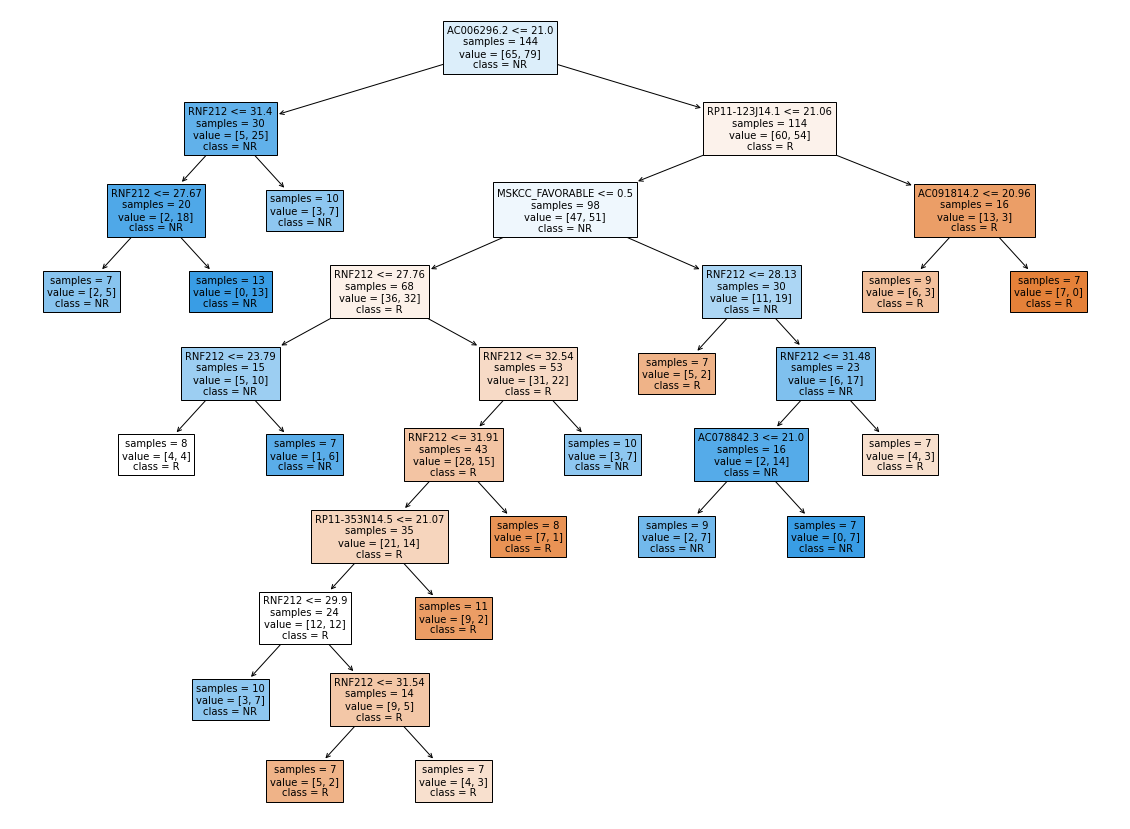

In [19]:
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(20, 15))

print(f"Profundidad del árbol: {model.get_depth()}")
print(f"Número de nodos terminales: {model.get_n_leaves()}")

plot = plot_tree(
            decision_tree = model,
            feature_names = cols,
            class_names   = ['R','NR'],
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )